<a href="https://colab.research.google.com/github/mmillania/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Gamma Correction pada citra
------------------------------
Masukkan Nilai Gamma: 3


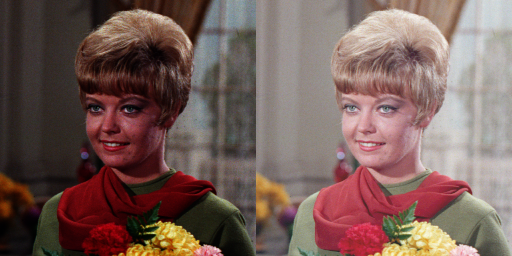

In [2]:
#Nomer 1
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob as glob

print('Gamma Correction pada citra')
print('------------------------------')
try:
  gamma = int(input('Masukkan Nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for z in range(original.shape[2]):
      gamma_image[y,x,z] = np.clip(255 * pow(original[y,x,z]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Simulasi Image Depth
--------------------
Masukkan nilai bit depth : 7


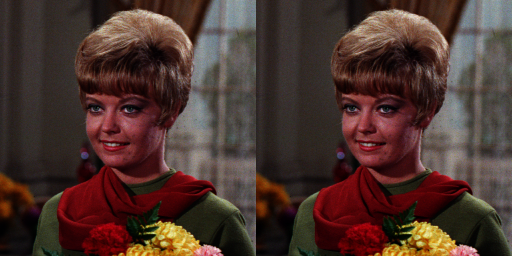

In [3]:
#Nomer 2 
original = cv.imread('/content/drive/MyDrive/PCVK_MM/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

print('Simulasi Image Depth')
print('--------------------')
try:
  bd = float(input('Masukkan nilai bit depth : '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

In [8]:
#Nomer 3 
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/PCVK_MM/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Jumlah Citra Average 5 :
dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

ValueError: ignored